TREINAMENTO DO MODELO DE DETECÇÃO DE LETRAS EM LIBAS

In [5]:
# IMPORT
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt

In [6]:
# Parâmetros
IMG_SIZE = 32
BATCH_SIZE = 32
EPOCHS = 50
DATASET_DIR = "../dataset"

# Data Augmentation + Normalização
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    shear_range=0.1,
    horizontal_flip=False
)

# Dados de treino
train_generator = datagen.flow_from_directory(
    DATASET_DIR,
    target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
    class_mode='categorical',
    batch_size=BATCH_SIZE,
    subset='training'
)

# Dados de validação
val_generator = datagen.flow_from_directory(
    DATASET_DIR,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)

# Mapeamento das classes (letras)
class_indices = train_generator.class_indices
print("Mapeamento das classes:", class_indices)

Found 5919 images belonging to 21 classes.
Found 1472 images belonging to 21 classes.
Mapeamento das classes: {'a': 0, 'b': 1, 'c': 2, 'd': 3, 'e': 4, 'f': 5, 'g': 6, 'i': 7, 'l': 8, 'm': 9, 'n': 10, 'o': 11, 'p': 12, 'q': 13, 'r': 14, 's': 15, 't': 16, 'u': 17, 'v': 18, 'w': 19, 'y': 20}


In [7]:
# Salvar mapeamento para uso posterior
import json
with open('../models/class_indices.json', 'w') as f:
    json.dump(class_indices, f)

In [8]:
# Modelo CNN aprimorado
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.4),
    Dense(train_generator.num_classes, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

c:\Users\edufa\miniconda3\envs\tf310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 21)             │         2,709 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 161,621 (631.33 KB)

 Trainable params: 161,621 (631.33 KB)

 Non-trainable params: 0 (0.00 B)

c:\Users\edufa\miniconda3\envs\tf310\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
185/185 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.2063 - loss: 2.5615
Epoch 1: val_loss improved from inf to 1.15129, saving model to models/best_model.h5


185/185 ━━━━━━━━━━━━━━━━━━━━ 13s 64ms/step - accuracy: 0.2072 - loss: 2.5587 - val_accuracy: 0.5897 - val_loss: 1.1513
Epoch 2/50
185/185 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.6370 - loss: 1.1565
Epoch 2: val_loss improved from 1.15129 to 0.82568, saving model to models/best_model.h5


185/185 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - accuracy: 0.6372 - loss: 1.1559 - val_accuracy: 0.7303 - val_loss: 0.8257
Epoch 3/50
184/185 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7420 - loss: 0.7907
Epoch 3: val_loss improved from 0.82568 to 0.56783, saving model to models/best_model.h5


185/185 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - accuracy: 0.7422 - loss: 0.7902 - val_accuracy: 0.8132 - val_loss: 0.5678
Epoch 4/50
183/185 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.8027 - loss: 0.6381
Epoch 4: val_loss improved from 0.56783 to 0.47640, saving model to models/best_model.h5


185/185 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - accuracy: 0.8027 - loss: 0.6377 - val_accuracy: 0.8363 - val_loss: 0.4764
Epoch 5/50
184/185 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.8402 - loss: 0.5115
Epoch 5: val_loss did not improve from 0.47640
185/185 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - accuracy: 0.8403 - loss: 0.5112 - val_accuracy: 0.8261 - val_loss: 0.5193
Epoch 6/50
185/185 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.8609 - loss: 0.4692
Epoch 6: val_loss improved from 0.47640 to 0.39724, saving model to models/best_model.h5


185/185 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - accuracy: 0.8609 - loss: 0.4690 - val_accuracy: 0.8709 - val_loss: 0.3972
Epoch 7/50
185/185 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.8887 - loss: 0.3608
Epoch 7: val_loss improved from 0.39724 to 0.38844, saving model to models/best_model.h5


185/185 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - accuracy: 0.8887 - loss: 0.3608 - val_accuracy: 0.8750 - val_loss: 0.3884
Epoch 8/50
185/185 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.8977 - loss: 0.3494
Epoch 8: val_loss improved from 0.38844 to 0.29689, saving model to models/best_model.h5


185/185 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - accuracy: 0.8978 - loss: 0.3493 - val_accuracy: 0.8927 - val_loss: 0.2969
Epoch 9/50
185/185 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.9103 - loss: 0.2933
Epoch 9: val_loss did not improve from 0.29689
185/185 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - accuracy: 0.9103 - loss: 0.2933 - val_accuracy: 0.9001 - val_loss: 0.3112
Epoch 10/50
185/185 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.9109 - loss: 0.2640
Epoch 10: val_loss did not improve from 0.29689
185/185 ━━━━━━━━━━━━━━━━━━━━ 7s 38ms/step - accuracy: 0.9110 - loss: 0.2640 - val_accuracy: 0.8927 - val_loss: 0.3764
Epoch 11/50
185/185 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.9272 - loss: 0.2377
Epoch 11: val_loss improved from 0.29689 to 0.28319, saving model to models/best_model.h5


185/185 ━━━━━━━━━━━━━━━━━━━━ 7s 40ms/step - accuracy: 0.9272 - loss: 0.2376 - val_accuracy: 0.8995 - val_loss: 0.2832
Epoch 12/50
184/185 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.9326 - loss: 0.2170
Epoch 12: val_loss did not improve from 0.28319
185/185 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.9326 - loss: 0.2170 - val_accuracy: 0.8859 - val_loss: 0.3689
Epoch 13/50
183/185 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.9400 - loss: 0.1948
Epoch 13: val_loss improved from 0.28319 to 0.25851, saving model to models/best_model.h5


185/185 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.9400 - loss: 0.1949 - val_accuracy: 0.9164 - val_loss: 0.2585
Epoch 14/50
183/185 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.9420 - loss: 0.1797
Epoch 14: val_loss did not improve from 0.25851
185/185 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - accuracy: 0.9420 - loss: 0.1799 - val_accuracy: 0.8954 - val_loss: 0.3872
Epoch 15/50
184/185 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.9452 - loss: 0.1753
Epoch 15: val_loss did not improve from 0.25851
185/185 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - accuracy: 0.9452 - loss: 0.1752 - val_accuracy: 0.9178 - val_loss: 0.2913
Epoch 16/50
183/185 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.9530 - loss: 0.1412
Epoch 16: val_loss did not improve from 0.25851
185/185 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - accuracy: 0.9530 - loss: 0.1414 - val_accuracy: 0.9015 - val_loss: 0.2781
Epoch 17/50
185/185 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.9546 - loss: 0.1548
Epoch 17: val_loss did not impro

185/185 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - accuracy: 0.9577 - loss: 0.1392 - val_accuracy: 0.9300 - val_loss: 0.2179
Epoch 19/50
184/185 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.9588 - loss: 0.1354
Epoch 19: val_loss did not improve from 0.21786
185/185 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - accuracy: 0.9588 - loss: 0.1354 - val_accuracy: 0.9151 - val_loss: 0.2660
Epoch 20/50
184/185 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.9620 - loss: 0.1150
Epoch 20: val_loss did not improve from 0.21786
185/185 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.9620 - loss: 0.1150 - val_accuracy: 0.9219 - val_loss: 0.2535
Epoch 21/50
184/185 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.9600 - loss: 0.1194
Epoch 21: val_loss did not improve from 0.21786
185/185 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - accuracy: 0.9600 - loss: 0.1194 - val_accuracy: 0.9219 - val_loss: 0.2397
Epoch 22/50
184/185 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.9548 - loss: 0.1473
Epoch 22: val_loss did not impro

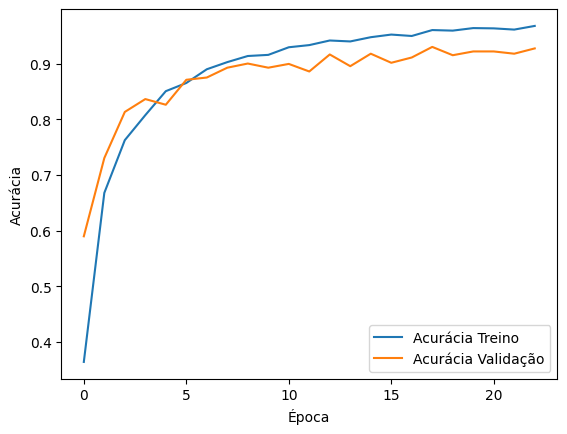

In [9]:
# Treinamento com early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

checkpoint = ModelCheckpoint(
    filepath='models/best_model.h5',
    save_best_only=True,
    monitor='val_loss',
    mode='min',
    verbose=1
)

history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=EPOCHS,
    callbacks=[early_stop, checkpoint]
)

# Plot dos resultados
plt.plot(history.history['accuracy'], label='Acurácia Treino')
plt.plot(history.history['val_accuracy'], label='Acurácia Validação')
plt.xlabel('Época')
plt.ylabel('Acurácia')
plt.legend()
plt.show()

In [10]:
# Salva o modelo treinado
model.save('../models/asl_gesture_model2.h5')
print("Modelo salvo como 'asl_gesture_model2.h5'")

Modelo salvo como 'asl_gesture_model2.h5'
